# Graphische Darstellung von Energiedaten

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import datetime as dt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import os.path
import platform
from PIL import Image
import requests
import scipy
from scipy.optimize import curve_fit
from distutils.spawn import find_executable


print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('platform', platform.__version__)
print('Image', Image.__version__)
print('requests', requests.__version__)
print('scipy', scipy.__version__)

Versionen der verwendeten python-Module: 
numpy 1.20.3
matplotlib 3.4.2
pandas 1.3.3
datetime <module 'datetime' from 'C:\\Users\\andre\\anaconda3\\envs\\SYE-env\\lib\\datetime.py'>
seaborn 0.11.2
plotly 5.4.0
sys 3.9.6 (default, Aug 18 2021, 15:44:49) [MSC v.1916 64 bit (AMD64)]
os <module 'os' from 'C:\\Users\\andre\\anaconda3\\envs\\SYE-env\\lib\\os.py'>
platform 1.0.8
Image 8.3.1
requests 2.26.0
scipy 1.7.1


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    #pd.set_option('display.latex.repr', True)
    #pd.set_option('display.latex.longtable', True)
    #plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"

In diesem Notebook werden einige der in [SYE-energydatasources](sye-energydatasources.ipynb) dargestellten Daten graphisch dargestellt.

## openMeter

Hier sind die elektrischen Verbrauchsdaten [kW] einer Realschule aus Wuppertal, in NRW, dargestellt.

__Als Zeitlinie:__

In [29]:
openMeterData = pd.read_csv('../data/openMeter-Realschule.csv')
openMeterData.set_index('ts', inplace=True)
openMeterData.index = pd.to_datetime(openMeterData.index)

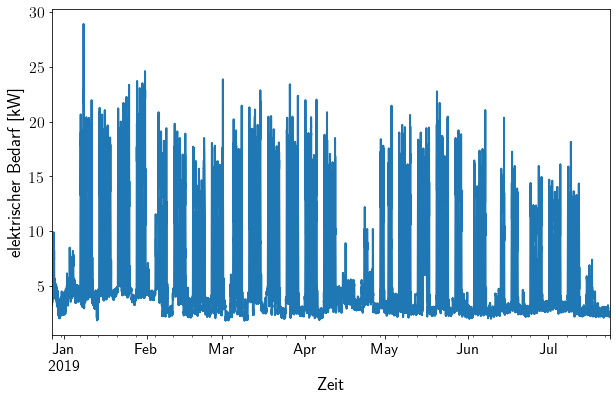

In [30]:
openMeterData.plot(xlabel='Zeit', ylabel=r'elektrischer Bedarf [kW]', legend=False);

__als Dauerlinie:__

In [33]:
openMeterSorted = openMeterData.sort_values(by='data', ascending=False, ignore_index=True)

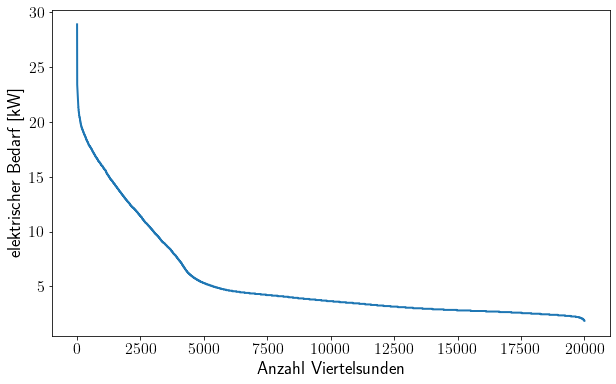

In [34]:
openMeterSorted.plot(xlabel='Anzahl Viertelsunden', ylabel='elektrischer Bedarf [kW]', legend=False);

__als heatmap:__

In [35]:
openMeterData['Datum'] = openMeterData.index.date
openMeterData['Zeit'] = openMeterData.index.time
openMeterDataPiv = openMeterData.pivot(index='Zeit', columns='Datum', values='data')

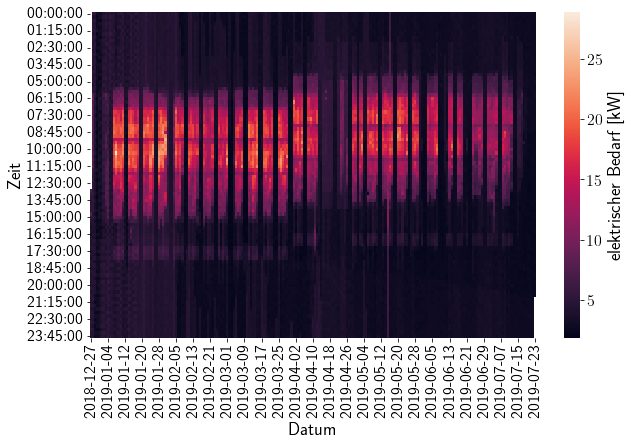

In [36]:
sns.heatmap(openMeterDataPiv, cbar_kws={'label': 'elektrischer Bedarf [kW]'});

Im Sommersemester geht es eine Schulstunde früher los?

## PLEXOS-World

Hier werden elerktrische Verbrauchdaten [MW?] unterschiedlicher Länder dargestellt. Im Folgenden übersichtshalber mal nur für Deutschland.

__als Zeitlinie:__

In [39]:
plexosData = pd.read_csv('../data/PLEXOS-World_All-Demand-UTC-2015.csv')
plexosData.set_index('Datetime', inplace=True)
plexosData.index = pd.to_datetime(plexosData.index)

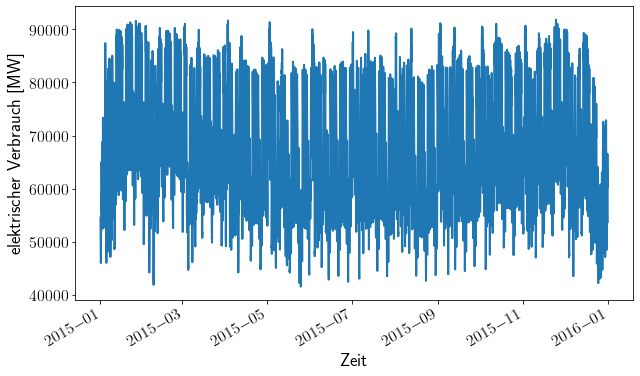

In [53]:
plexosData.loc[:, 'EU-DEU'].plot(legend=False, xlabel='Zeit',
                                ylabel='elektrischer Verbrauch [MW]');

__als Dauerlinie:__

In [44]:
plexosDataSorted = plexosData.sort_values(by='EU-DEU', ascending=False, ignore_index=True)

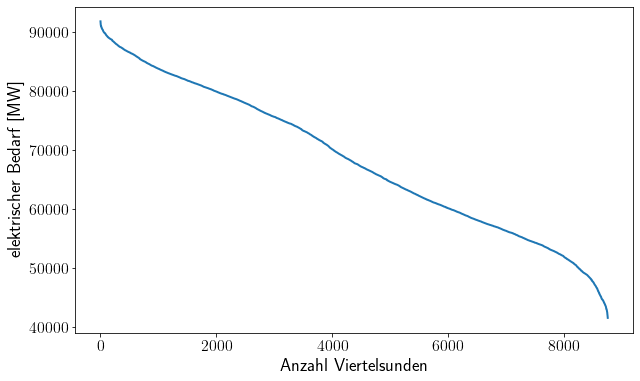

In [54]:
plexosDataSorted.loc[:, 'EU-DEU'].plot(xlabel='Anzahl Viertelsunden', ylabel='elektrischer Bedarf [MW]',
                                       legend=False);

__als heatmap:__

In [49]:
plexosData['Datum'] = plexosData.index.date
plexosData['Zeit'] = plexosData.index.time
plexosDataPiv = plexosData.pivot(index='Zeit', columns='Datum', values='EU-DEU')

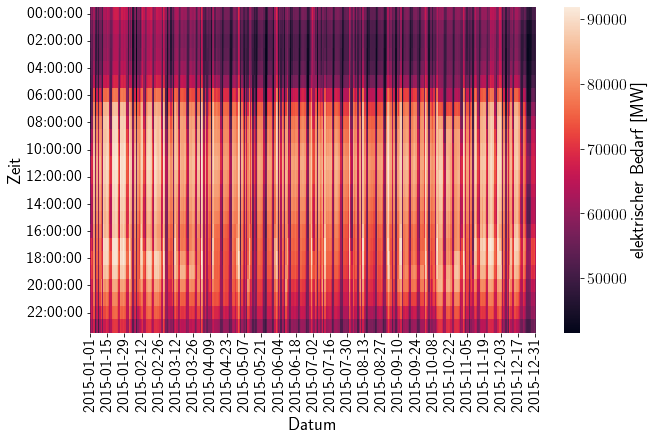

In [55]:
sns.heatmap(plexosDataPiv, cbar_kws={'label': 'elektrischer Bedarf [MW]'});

## OPSD Timeseries

Im Folgenden werden Daten zur installierten Leistung [MW] von Erneuerbaren in GB dargestellt.

__als Zeitreihe:__

In [92]:
opsdData = pd.read_csv('https://data.open-power-system-data.org/time_series/2020-10-06/time_series_30min_singleindex.csv')

In [93]:
# damit es keine Probleme mit LaTeX gibt
# => paar Spalten umbennen, dass Unterstrich weg!
opsdData.rename(columns={'utc_timestamp': 'utc timestamp',
                         'GB_GBN_solar_capacity': 'GB GBN solar capacity'},
               inplace=True)
opsdData.set_index('utc timestamp', inplace=True)
opsdData.index = pd.to_datetime(opsdData.index)
opsdData.drop(axis=1, labels='cet_cest_timestamp', inplace=True)

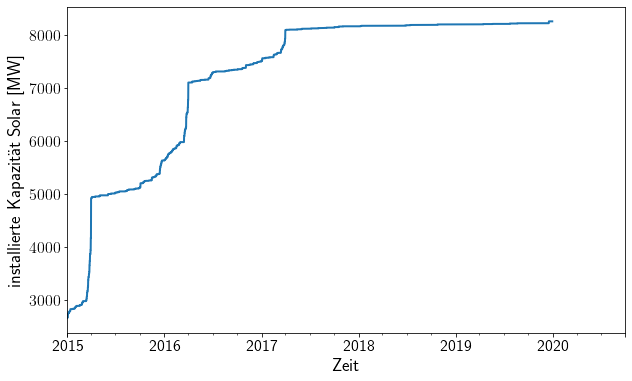

In [95]:
opsdData.loc[:, 'GB GBN solar capacity'].plot(ylabel='installierte Kapazität Solar [MW]',
                                             xlabel='Zeit');

__als Differenz:__

<AxesSubplot:xlabel='Zeit', ylabel='Zubau Solar [MW]'>

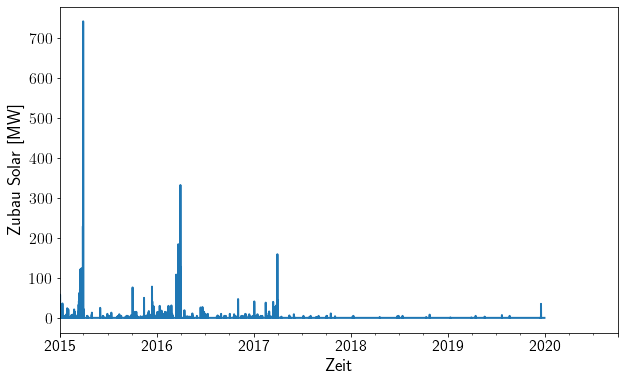

In [97]:
opsdDataDiff = opsdData.diff()
opsdDataDiff.loc[:, 'GB GBN solar capacity'].plot(xlabel='Zeit',
                                                 ylabel='Zubau Solar [MW]')

Immer im ersten Quartal der meiste Zubau!

## OPSD Weather Data

Hier werden Wetterdaten für Deutschland dargestellt.

__als Zeitreihe:__

In [139]:
opsdweatherData = pd.read_csv('https://data.open-power-system-data.org/weather_data/2020-09-16/weather_data.csv')

In [140]:
opsdweatherData.rename(columns={'utc_timestamp': 'utc timestamp'}, inplace=True)
opsdweatherData.set_index('utc timestamp', inplace=True)
opsdweatherData.index = pd.to_datetime(opsdweatherData.index)
opsdweatherData.rename(columns={col: col.replace('_', ' ') for col in opsdweatherData.columns\
                                if 'DE' in col}, inplace=True)

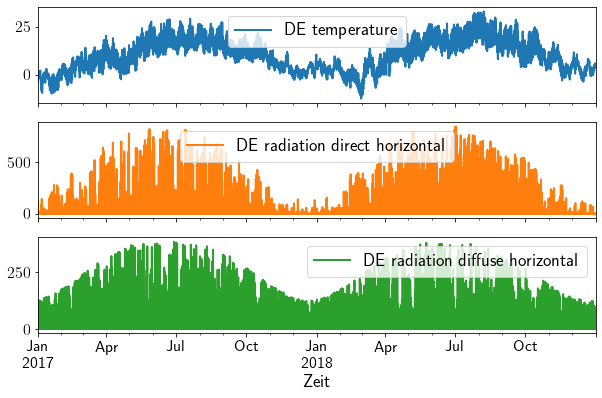

In [143]:
opsdweatherData.loc['2017':'2018', [col for col in opsdweatherData.columns if 'DE' in col]].plot(subplots=True,
                                                                                    legend=True,
                                                                                    xlabel='Zeit');

__als heatmap:__

In [159]:
opsd2017_18 = pd.DataFrame(opsdweatherData.loc['2017':'2018', 'DE temperature'])
opsd2017_18['Zeit'] = opsd2017_18.index.time
opsd2017_18['Datum'] = opsd2017_18.index.date
opsd2017_18Piv = opsd2017_18.pivot(index='Zeit', columns='Datum')

<AxesSubplot:xlabel='None-Datum', ylabel='Zeit'>

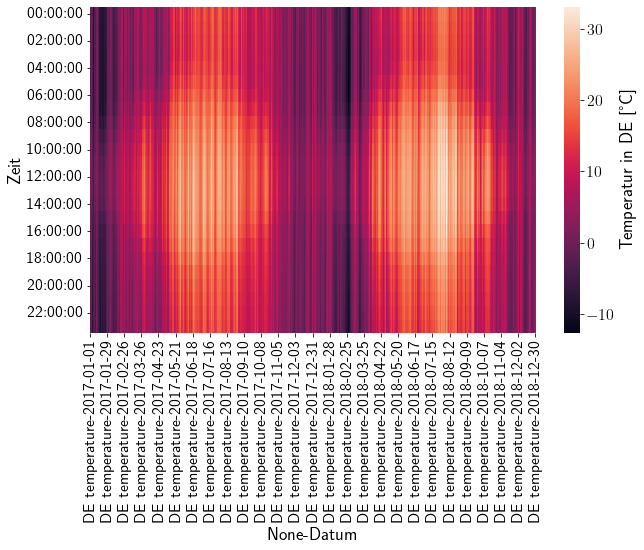

In [160]:
sns.heatmap(opsd2017_18Piv, cbar_kws={'label': 'Temperatur in DE [°C]'});

## OPSD Household Data

Im notebook [Beispiel Datenanalyse](../02/Beispiel_Datenanalyse.ipynb) werden diese Daten schon ausführlich besprochen und dargestellt.

## OPSD When2Heat

Hier werden Daten zum Heizbedarf in deutschen Einfamilienhaushalten [MW] dargestellt:

__als Zeitreihe:__

In [35]:
heatData = pd.read_csv('https://data.open-power-system-data.org/when2heat/2019-08-06/when2heat.csv',
                       sep=';', usecols=['DE_heat_demand_space_SFH', 'utc_timestamp'])

In [36]:
heatData.rename(columns={col: col.replace('_', ' ') for col in heatData.columns}, inplace=True)
heatData.set_index('utc timestamp', inplace=True)
heatData.index = pd.to_datetime(heatData.index)

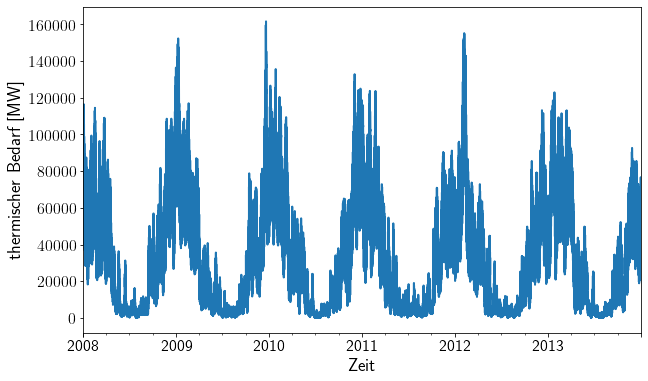

In [37]:
# fehlen paar Werte => weg mit
heatData.dropna(inplace=True)
heatData.plot(xlabel='Zeit', ylabel='thermischer Bedarf [MW]', legend=False);

__als Dauerlinie__

In [38]:
heatDataSorted = heatData.sort_values(by='DE heat demand space SFH', ascending=False, ignore_index=True)

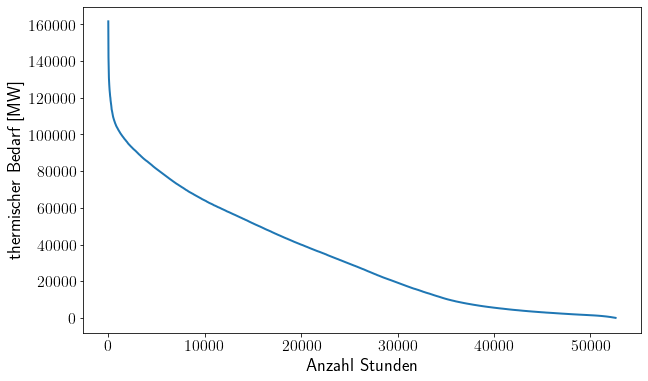

In [39]:
heatDataSorted.plot(xlabel='Anzahl Stunden', ylabel='thermischer Bedarf [MW]', legend=False);

__als heatmap:__

In [40]:
heatData2013 = pd.DataFrame(heatData.loc['2013', :])

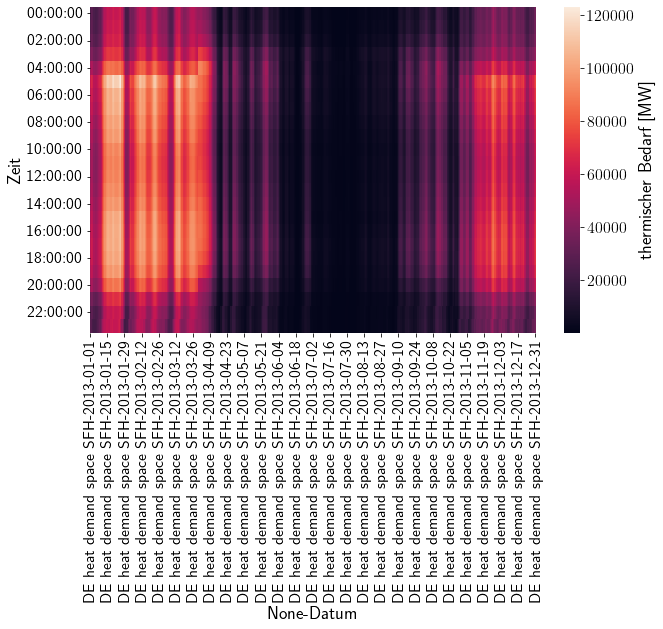

In [42]:
heatData2013['Datum'] = heatData2013.index.date
heatData2013['Zeit'] = heatData2013.index.time
heatData2013Piv = heatData2013.pivot(index='Zeit', columns='Datum')
sns.heatmap(heatData2013Piv, cbar_kws={'label': 'thermischer Bedarf [MW]'});

## SMARD

Hier werden Daten für den prognostizierten Strombedarf in Deutschland dargestellt.

__als Zeitreihe:__

In [50]:
smardData = pd.read_csv('../data/smard_prog_el_dem.csv', sep=';')
smardData.index = pd.date_range(start='2022-01-07', end='2022-01-18',
                                periods=len(smardData))

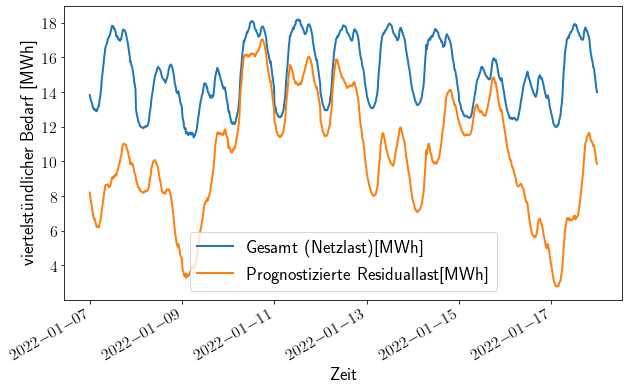

In [64]:
smardData.plot(ylabel='viertelstündlicher Bedarf [MWh]', xlabel='Zeit');

__Residuallast als heatmap__

In [62]:
smardDataPiv = smardData.pivot(columns='Uhrzeit', index='Datum',
                               values='Prognostizierte Residuallast[MWh]')

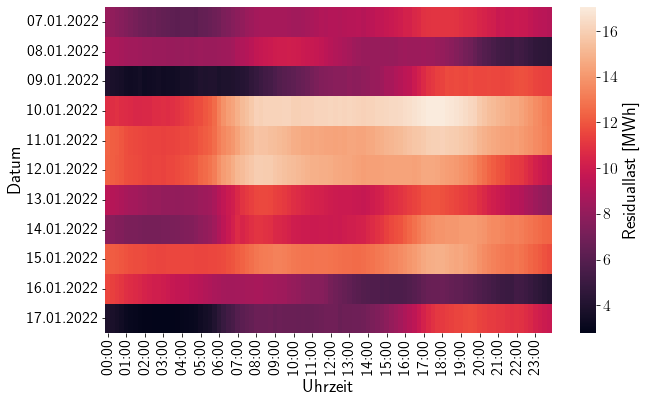

In [65]:
sns.heatmap(smardDataPiv, cbar_kws={'label': 'Residuallast [MWh]'});